# Bivariate Analysis with Seaborn

Firstly, we import necessary libraries and load penguins dataset as 'penguins'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
penguins = sns.load_dataset('penguins')

In [3]:
# Take a look at the first5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.dropna(inplace = True)

## 1. Categorical variables

If you want to visualize data involving categorical variable, you can choose between 2 plotting approaches as we already saw in the preceding notebook: 

a) `catplot()` plotting function 

- this is Figure-level interface that allows you to plot categories
- by calling this function, `a stripplot` will be drawn by default
  
Important note: specifying data

- data you want to visualize must passed in a long-form DataFrame 
- categorical and numerical variable must be passed as strings to `x` and `y` parameters in the following way:   
  ```sns.catplot(data = dataset, x = 'categorical_variable', y = 'numerical_variable')```
  

- the below code won´t work:  
  ```sns.catplot(x = data['categorical_variable'], y = data['numerical_variable'])```
  
`catplot()` functions provides us the access to other axes-level plotting functions, that you can select by passing respective plot kind to `kind` parameter:

- "box", "swarm", "strip", "violin", "barplot", etc. 
  

b) axes-level plotting functions
- `sns.boxplot()`
- `sns.swarmplot()`
- `sns.stripplot()`
- `sns.violinplot()`
- `sns.countplot()`
- `sns.barplot()`, etc.
 
It´s up to you what approach better suits you.


## 1.1 Categorical vs. Numerical variable

One thing you could be interested in is to find out how the distribution of numerical variable vary accros different categories. For this purpose you can useplotting functions such `sns.boxplot()`, `sns.violinplot()`, `sns.boxenplot()`. **Histograms ?**

### 1.1.1 Boxplot

Inside a function for creating a boxplot we specify dataset and variable names. A categorical variable 'species' will be plotted on the x-axis and respective values of 'body_mass_g' on y-axis. 
**add title, axis labels**

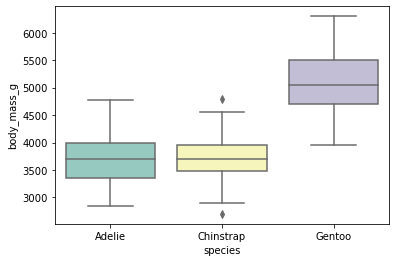

In [5]:
# Boxplots of body mass of penguins based on the species
sns.boxplot(data = penguins, x = 'species', y = 'body_mass_g', palette = 'Set3');

Visualization of the distribution reveals us interesting differences and similarities among species. For Adelie and Chinstrap, the majority of penguins do weigh up to approximately 4000 grams, although Chinstrap weight range is smaller than Adelie penguins. These two species have also the same median value of 3700 grams (we also verified median values in the code cell below). In case of Chanstrap penguins, there are present outliers, which can indicate that some penguins weight differently less or more compared to the rest of observations. Gentoo penguins are overally heavier, while the vast majority of penguins have weight about 4700-5500 grams. this species has the highest range of recorded values.  

In [6]:
# Median values of Adelie and Chinstrap species
print('Adelie body mass-median value: ', penguins[penguins.species == 'Adelie'].body_mass_g.median(),
      '\n'
      'Chinstrap body mass-median value: ', penguins[penguins.species == 'Chinstrap'].body_mass_g.median())

Adelie body mass-median value:  3700.0 
Chinstrap body mass-median value:  3700.0


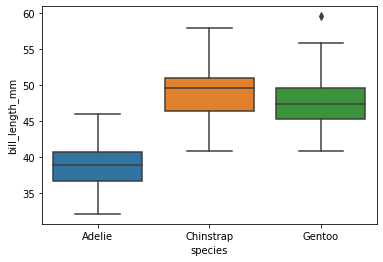

In [7]:
# Boxplots of the bill length based on the species
sns.boxplot(data = penguins, x = 'species', y = 'bill_length_mm');

From the boxplots we can say, that Adelie species is characteristic with the shortest length of the bill, while the most penguins have about 37-41 milimeters long bill. The bill length of Chinstrap and Gentoo species is from about 41 mm. If we do not take into account the outlier of Gentoo species, this species have shorter bills compared to Chinstrap penguins.
**add title, axis labels**

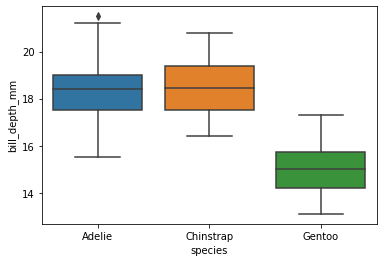

In [8]:
# TASK 1 >>> Create a boxplots of the depth of the bills based on species
#        >>> Change the size of a Figure
#        >>> Add title and axis labels
sns.boxplot(data = penguins, x = 'species', y = 'bill_depth_mm');

> What can you say about those 3 species in term of the bill depth? How does the distribution differ ? What about the range of values? What species has the smallest bill depth range?

### 1.1.2 Swarmplot

We can also take a closer look at three islands where penguins live. Since our dataset does not comprise too many observations, the data points are nicely plotted. 
**add note about swarmplot in case of large number of observations - subset?**
**add title, axis labels**

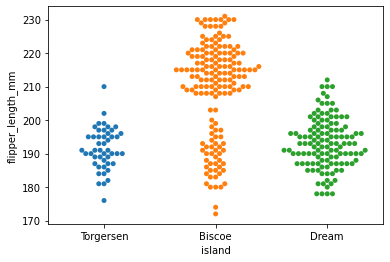

In [9]:
# Swarmplot of the flipper length based on islands
sns.swarmplot(data = penguins, x = 'island', y = 'flipper_length_mm');

Now we see the distribution of penguins´s flipper length on three islands, but this plot does not provide us any specific and useful information. We can say only, for example, there are penguins with either really short flippers or vast majority of penguins have long flippers about 215 milimeters on Biscoe island. 

Let´s explore what species are actually present on particular islands.

In [10]:
# Group data based on island and count penguins
penguins.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: species, dtype: int64

Interesting, Adelie species inhabit all three islands. Gentoo penguins are present only in Biscoe island and Chinstrap´s home is Dream island. Let´s filter the dataset only for Gentoo and Chinstrap penguins.

Filtering approach is up to you. You can create a subset of a DataFrame with specific rows based on a condition using indexing like in this example:   
```subset = data['weight'] == 85```

This operation checks for whether the row contain value 85 and returns only those rows where this condition is fulfilled.

Another option is to used  `query` which we apply onto the DataFrame and I find it more straightforward. We specify that, we want to filter only those rows, where Gentoo and Chinstrap penguins are present as species. Since we filter for more than 1 condition, these species must by passed as a list. We use `in` keyword, which check whether a species is present in the list.


Choose a approach which the best suits you. I included both of them for comparing the code syntax.

In [11]:
# Filtering only Gentoo and Chinstrap species using Pandas query
penguins_filter = penguins.query('species in ["Gentoo","Chinstrap"]')

In [12]:
# Filtering only Gentoo and Chinstrap species using indexing
penguins_fil = penguins[penguins['species'].isin(["Gentoo","Chinstrap"])]

In [13]:
# The new DataFrame penguins_filter will be returned as an output
penguins_filter

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**add title Gentoo and chnistrap subset**

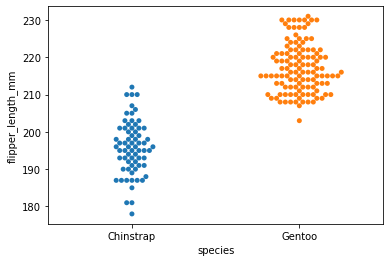

In [14]:
# TASK >>> Create a swarmplot using created penguins_filter subset
#      >>> Visualize flipper length based on Chinstrap and Gentoo species
sns.swarmplot(data = penguins_filter, x = 'species', y = 'flipper_length_mm');

### 1.1.3 Stripplot

As you already learned how to create a stripplot, try the following exercise of visualizing Adelie species flipper length distribution based on categories of the gender.

In [15]:
# TASK 2 >>> Now try to filter only Adelie species and save it as adelie_filter
#        >>> You can again query penguins DataFrame as we did before
adelie_filter = penguins.query('species == "Adelie"')

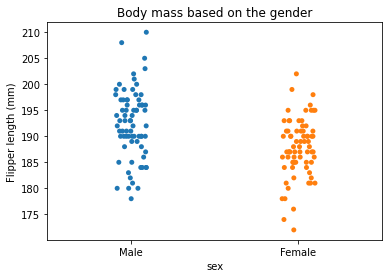

In [16]:
# TASK >>> Visualize Adelie´s flipper length distribution using swarmplot based on the gender
#      >>> Add title and change y-axis label to 'Flipper length (mm)'
ax = sns.stripplot(data = adelie_filter, x = 'sex', y = 'flipper_length_mm')
ax.set(title = 'Body mass based on the gender',
      ylabel = 'Flipper length (mm)');

> Questions

### 1.1.4 Violinplot

Categories can be nicely compared using a violinplot which shows statistics from boxplot and the shape of distribution that comes from density plot. A violinplot is a good choice for plotting the distribution when visualizing the large number of observations is not sufficient due to data points overlapping.

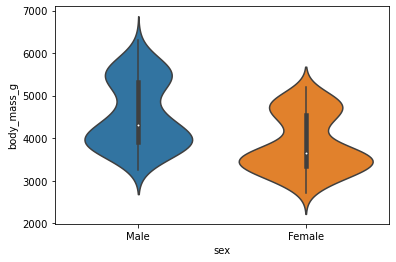

In [17]:
# A violinplot of 'body_mass_g' variable
sns.violinplot(data = penguins, x = 'sex', y = 'body_mass_g');

A violinplot consists of boxplot that is displayed in the middle. The thick black bar represents the majority of values (IQR) and the white dot is the median value. Thin black lines represent the rest of data points. There shape of distribution is displayed on each side. The interpretation of violinplot is similar for instance to swarmplot. Wider parts represent higher frequency of observations, while thinner parts denote less observations. You can notice that most male penguings have weight about 4000 grams and are generally heavier than females.

---

Please, see the [documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html) for specifying other parameters.

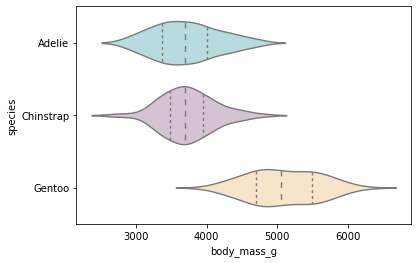

In [18]:
# A violin plot of 'body_mass_g' variable based on 'species'
color = {'Adelie':'powderblue','Chinstrap':'thistle','Gentoo':'bisque'}
ax = sns.violinplot(data = penguins, x = 'body_mass_g', y = 'species',
                    inner = 'quartile',
                    linewidth = 1.4,
                    palette = color);

### 1.1.5 Displot

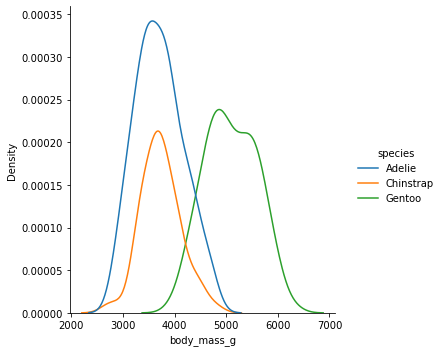

In [19]:
# A displot of 'body_mass_g' variable based on 'species'
sns.displot(data = penguins, x='body_mass_g', hue = 'species', kind = 'kde');

## 1.2 Categorical vs. categorical variable

With a countplot we are able to count the number of observations in each catogory and then compared how these values vary accross categories. 

Let´s visualize how many females and males penguins are present in each species.

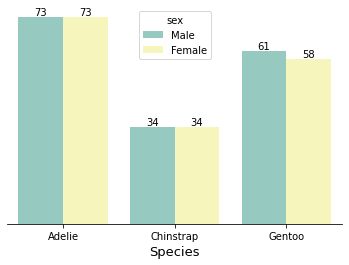

In [20]:
# A countplot of male and females penguins based on species
bars = sns.countplot(data = penguins, x = 'species', hue = 'sex', palette = 'Set3')

# Annotation for bars and example customizations
for b in bars.patches:                               
    bars.annotate('{:.0f}'.format(b.get_height()),  # Showing the count and string formatting to no decimal place
                 (b.get_x() + 0.2, b.get_height()), # A tuple of the left coordinate of bar with adding some float to center it 
                                                    # and getting the height of a bar - to change the placement of numbers,
                                                    # substract some number from b.get_height() to see the change 
                  ha='center',                      # Setting horizontal alignment of text
                  va='bottom',                      # Setting vertical alingment of text
                  color= 'black',                   
                  fontsize = 10)
sns.despine(top = True, left = True)                # Removing spines from plot
bars.set(ylabel = '', yticks = [])                  # Removing y-axis labels and y-axis ticks         
bars.set_xlabel('Species', fontsize = 13);      

# 2. Numerical vs. numerical variable

During bivariate analysis of two numerical variables we attempt to determine any relationship between them and how these variables relate together. **dopisat**

## 2.1 Relplot

Seaborn´s `replot()` plotting function creates a relational plot. The output of this function is a FacetGrid object which allows to extend existing plot in several ways, for instance adding another subplots or adding a subset of the data to visually display various categories. These options will be discussed in the last notebook about Multivariate analysis.

It is also possible to choose method of visualizing statistical relationship using `kind` parameter:
- `kind = 'scatter'` - by default
- `kind = 'line` 

For now let´s focus on creating a default relational plot comparing 2 numerical variables at once. We specify input dataset to `data` parameter and assign numerical variables as strings to `x` and `y`. 

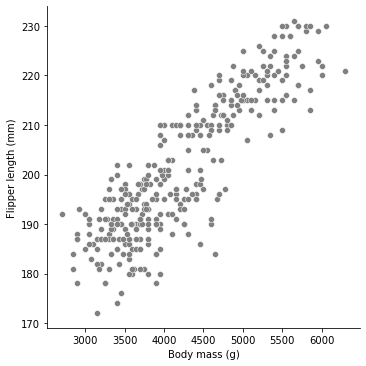

In [21]:
# Relationship between body mass and the flipper length
rel = sns.relplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm',
                 color = 'grey')
rel.set(xlabel = 'Body mass (g)', ylabel = 'Flipper length (mm)');

The above plot shows the relationship between penguin´s body mass and the flipper length. We can see, that these two characteristics are strongly related with each other. The clear pattern indicates that with increasing body mass, there are an increase of the flipper length. 

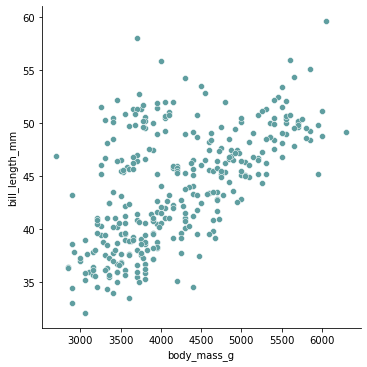

In [22]:
# Relationship between body mass and bill length 
sns.relplot(data = penguins, x = 'body_mass_g', y = 'bill_length_mm', color = 'cadetblue');

Again, we can observe some kind of relationship between body mass and the bill length. You can notice that penguins that weight about 3500 grams tend to have either short bill (roughly about 35-40 mm), or longer bill (above 45 mm). After the weight about 4500 grams, the relationship becomes somewhat stronger and with increasing body mass, the bill length is longer. This is the case, when we would need to take a closer look at the relationship by implementing some kind of visual semantic to gain more information from the data.

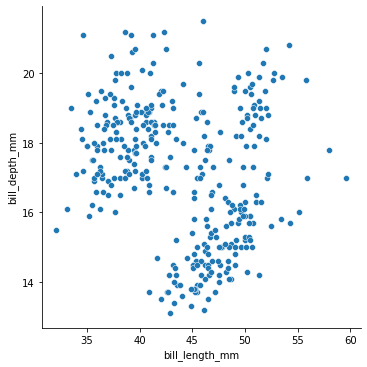

In [23]:
# TASK >>> Create a relplot tovisualize the relationship between 'bill_length_mm' and 'bill_length_mm' variables
sns.relplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm');

> What can you say about this relationship ? Does the bill length relate to the bill depth? Is there some indication about a strong relationship or you barely see any patterns ?  

## 2.2 Scatterplot

Another option to create a relational plot is using axes-level function `scaterplot()`. 

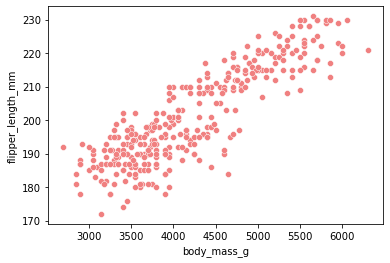

In [24]:
# Relationship between 'body_mass_g' and 'flipper_length_mm'
sns.scatterplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm', color = 'lightcoral');

We can see a strong positive relationship between the body mass and the flipper length. 

## 2.3 Visualizing trends

### 2.3.1 Regplot

The axes-level function`regplot()` creates a scatterplot and a line of the best fit with a default 95% confidence interval which is drawn using translucent bands around the line. The similar plotting function is `lmplot()` which take use of regplot and FacetGrid object so that you can compare several categories in a Figure.

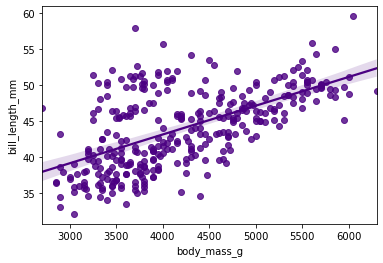

In [25]:
# A regplot of 'body_mass' and 'flipper_length_mm' variables
sns.regplot(data = penguins, x = 'body_mass_g', y = 'bill_length_mm',
            color = 'indigo',
            ci = 99);           # Setting the size of confidence interval for the estimate

# 3. Heatmap

Often, we want to compute correlation coefficients to see the strength and the direction of the relationship. This can be done using Pandas´s `corr()` function that take input data and compute pairwise correlation of variables.

Types of correlation, that can be specified as an argument to `method` parameter:
- pearson
- kendall
- spearman

Correlation matrix can be visualized using a heatmap where correlation coefficients are represented as colors. Values of correlation coefficients can take a range from -1 (a strong negative relationship) to 1 (a strong positive relationship). Since the coefficients take either high or low values, we should select a specific color palette called diverging.

In [53]:
# Computing correlation coefficients
corr = penguins.corr()

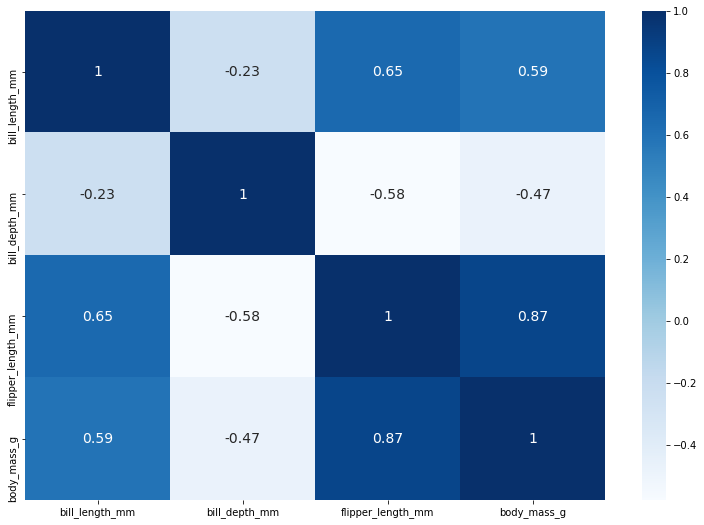

In [67]:
# A heatmap of penguins dataset
fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr, 
            annot = True,                 # Correlation coeficients will be displayed in each cell
            annot_kws = {'fontsize':14},  # Setting a fontsize
            cmap = 'Blues');              # Setting a color map

# 4. Practice time

You will continue exploring Bank marketing dataset as in the previous notebook.

## 4.1 Loading data, preprocessing

In [27]:
# Load the data 
data = pd.read_csv('Datasets/bank_data.csv',sep = ';')
# Let´s rename some of variables
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [28]:
# Remove duplicated rows
data.drop_duplicates(inplace = True)

In [29]:
# Select all variables that need to be converted
to_category = ['job','marital_status','education','default_credit','house_loan', 
               'loan','contact_type','month','day_of_week', 'previous_campaign_outcome']

In [30]:
# Convert them to category data type
for col in to_category:
  data[col] = data[col].astype('category')

In [31]:
# Create a dictionary with original values and corresponding new values for days
mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}
# Map new values to column 'day_of_week'
data.day_of_week = data.day_of_week.map(mapping_days)

In [32]:
# Create a dictionary with original values and corresponding new values for months
mapping_months = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}
# Map new values to column 'month'
data.month = data.month.map(mapping_months)

In [33]:
# Converting seconds to minutes
data.contact_duration = data.contact_duration.apply(lambda x: x / 60)

In [34]:
# Inspect the data
data

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,November,Friday,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,November,Friday,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,November,Friday,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,November,Friday,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


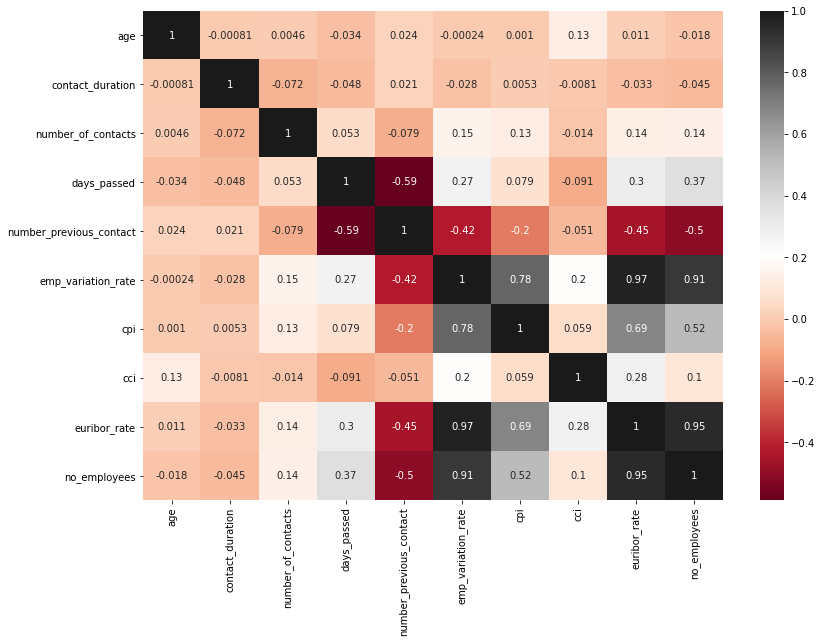

In [74]:
# TASK >>> Create a Figure object and set size to (13,9)
#      >>> Create a heatmap of data with written correlations coefficients
#      >>> Set color palette: 'RdGy'
fig, ax = plt.subplots(figsize = (13,9))
data_corr = data.corr()
sns.heatmap(data_corr,
           cmap = 'RdGy',
           annot = True);

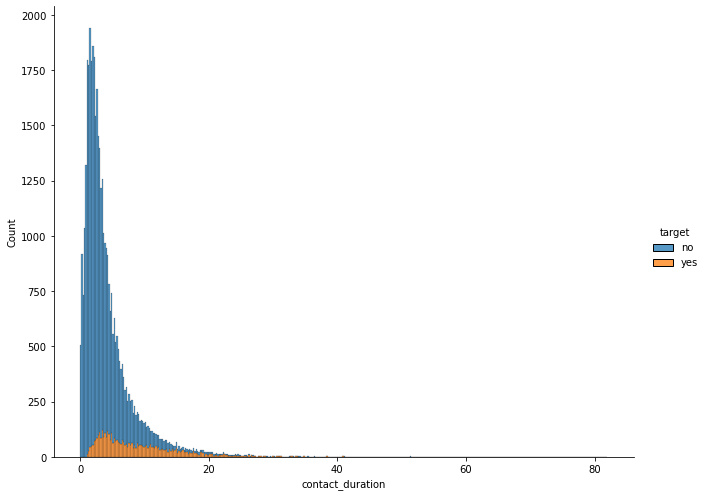

In [95]:
# TASK >>> Create a histogram of 'contact_duration' based on 'target' variable
#      >>> Set parameter: multiple = 'stack'
#      >>> Set parameters: height = 7, aspect = 1.3
sns.displot(data = data, x='contact_duration', 
            hue = 'target', 
            multiple="stack",
            height = 7, 
            aspect = 1.3);

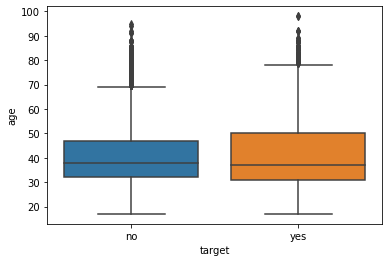

In [96]:
# TASK >>> Create a boxplot of 'age' variable based on 'target'
sns.boxplot(data = data, x = 'target', y = 'age');

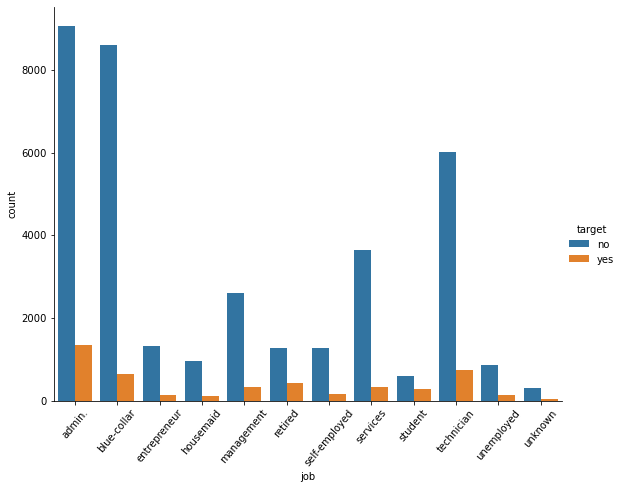

In [37]:
# TASK >>> Create a countplot using a Figure-level function catplot() 
#      >>> Visualize 'target' variable based on client´s job
#      >>> Specify parameters: height = 6 and aspect = 1.3
#      >>> Set the rotation of x-axis tick labels to 50 degrees
sns.catplot(data = data, x = 'job', hue = 'target',
            kind = 'count',
            height = 6, 
            aspect = 1.3)
plt.xticks(rotation = 50);

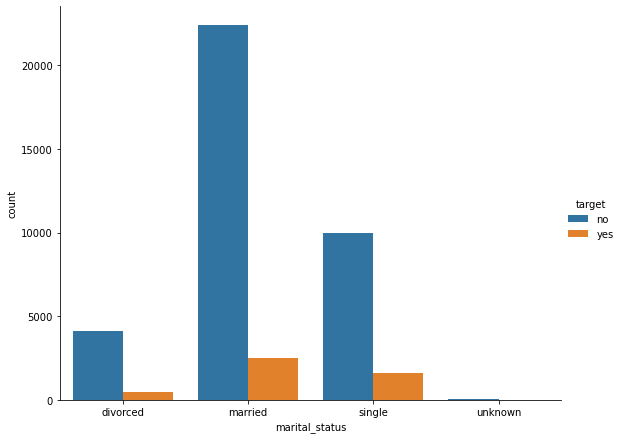

In [38]:
# TASK >>> Create a countplot of 'marital_status' based on 'target'
#      >>> Specify parameters: height = 6 and aspect = 1.3
sns.catplot(data = data, x = 'marital_status', 
            hue = 'target',
            kind = 'count',
            height = 6, aspect = 1.3);